# Введение в искусственные нейронные сети

# Часть 4. Сверточные нейронные сети

---
* Смысл фильтров (свертки) - выделить особые места на изображении (признаки). Нужные коэффициенты фильтра подбираются за счет обучения сетки.

* Пуллинг чистит признаки от лишней информации и убирает локальную привязку. Пуллинг - отбрасывание менее значимых сигналов, представленных в виде чисел. 

* Если всё время использовать только свертки, то в какой-то момент мы получим очень много признаков, но возможно столько признаков-то и не нужно. Имеет смысл сделать полученную информацию более общей. Poolling снижает размерность карты признаков, информация упрощается, с одной стороны хорошо - уменьшается размер данных, но с другой - мелкие детали теряются.

* Padding - отвечает за размерность изображения после свертки. Same - сохранение размерности на выходе, Valid - обрезка изображения на выходе по краям (размерность=x-kernel_size+1)

* Stride - шаг свертки (через 1 обычно, но можно сетать разные). 

* Для каждого канала могут быть разные свертки, но можно и объединять их в 1 канал :)

* Сейчас обычно уже берут ПРЕДОБУЧЕННЫЕ СЕТИ (ResNet, ImageNet и т.д.). В своем проекте Voice Verification я также брал предобученную сеть.

* ImageDataGenerator - аугментация в реальном времени.
---

## Содержание:

<ol>
<li>Что такое Сверточные нейронные сети</li>
<li>Архитектура Сверточных нейронных сетей</li>
<li>Несколько практических примеров сверточных нейронных сетей на Keras</li>
</ol>

## Что такое Сверточные нейронные сети

<img src='images/lnet5.png'>

Источник - http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

Сверточные нейронные сети - это нейронные сети приспособленные впервую очередь для задач распознования образов. Это самый природо-подобный алгоритм из всех. Современные сверточные нейронные сети базируется на произведшей революцию в комп. зрении нейронной сети AlexNet, она базируется на сверточных нейронных сетях, которые разрабатывал Ян Лекун в 90 гг., те в свою очередь базируется на японском Neocognitron 1980 г., а он свою очередь на открытиях в области зрительной коры головного мозга. Конечно современные архитектуры сверточных нейронных сетей такие Inception-v4 сильно отличаются от сверточных нейронных сетей 90-x. Однако у них есть общие черты, которые и делают сверточные нейронные сети эффективными. Особенности сверточных нейронных сетей о которых речь пойдет далее призваны помочь строить глубокие нейронные сети, имеющими меньшие вычислительные затраты чем полносвязные. 

Главная отличительная черта сверточных нейронных сетей - это наличие *сверточных слоев* и *пуллинг слоев*. Подобные слои как раз и были обнаружены в зрительной коре головного мозга, но они называны по другому и работают конечно более сложным образом. В искусственной нейронной сети сверточный слой состоит из фрагментов, которые связаны только с определенной частью изображения, что позволяет не связывать каждый нейрон с каждым пикселем и уменьшить вычислительные затраты. Конечная цель сверточного слоя получить определенные признаки от изображения и передать их в следующий слой, точно также как и случае с обычной полнозсвязной нейронной сетью. Но сверточный слой это делает более эффективно. Если говорить упрощенно, то сама операция свертки предствляет из себя процесс преобразования большего набора чисел в меньший набор чисел их репрезентующий. Пуллинг слои следуют за сверточными слоями и призваны очистить от лишней информации эти признаки и убрать у них локальную привязку. Сама операция пуллинга если говорить опять же упрощенно представляет из себя процесс отбрасывания менее значимых сигналов представленных в виде чисел. Пулинг слои являются важной состовляющей нейронных сетей, однако из-за них сверточной нейронной сети всеравно где располагаются глаза например у кота над носом или под носом, главное сочетание этих признаков.

Сверточная нейронная сеть строиться по принципу пирамиды - первые слои содержат больше нейронов, а последующие все меньше и меньше. Связано это с тем что низкоабстрактных признаков больше чем высокоабстрактных.

Как правило на конце нейронной сети располагаются несколько полносвязных слоев. Эти слои как раз уже учатся на высокоабстрактных признаках которых немного и соотвественно не требуется много слоев и соотвесвенно с точки зрения вычислительных затрат они приемлимы. Т.е. получается сверточную нейронную сеть можно условно поделить на две части - одна извлекается признаки, а другая, полносвязная обучается на этих признаках.

Однако стоит отметить, что современные сверточные нейронные сети в целях оптимизации их работы снабжаются многим дополнительными архитектурными решениями, такими например как возможность иметь в одном слое разные конфигурации свертки, пропускать при необходимости сигнал обратного распространения ошибки сквозь слои, использование нескольких слоев свертки подряд, неиспользование полносвязных слоев на конце нейронных сетей. Как правило, все эти нововведения направлены на то чтобы сделать нейронные сети более глубокими, что в свою очередь улучшает точность работы нейронных сетей. 

<img src='images/conv11.png'>

Допустим, мы будем работать с изображениями животных. Первые слои выучат признаки животных низкого уровня абстракции, такие как линии под определенными углами, следующие слои на базе этих признаков выучат более сложные признаки, например геометрические фигуры на базе сочетания этих линий. Следующие слои выучат такие признаки как глаза, уши и т.д. которые будут составлены из этих геометрических фигур. Подобные высокоасбтрактные признаки, как названнные выше, уже можно использовать для того, чтобы сделать заключение, какое животное на картинке.

## Применение сверточных нейронных сетей

- Задачи классификации (Задачи связанные с определением того какому классу принадлежит объект на фотографии)

- Задачи локализации, детекции (Определяем где находиться объект на изображении)

- Задачи сегментации (Выделение объектов и границ, присвоение пикселям одного объекта одних и тех же меток)

<img src='images/cats_dogs1.png'>

- Проставление лейблов изображениям. Используется Google, Amazon, Facebook

- Распознавание лиц

- Визуальный поиск (Используется Google)

<img src='images/visual_find1.png'>


- Помощь врачам в анализе медицинских снимков

- Предиктивная аналитика. Помощь в предсказании проблем со здоровьем

- Оценка цифр написанных от руки банками. Одно из самых ранних применений сверточных нейронных сетей.

- Рекомендательные системы. Amazon например, использует это для секции "вам также может понравиться" для одежды.

- В социальных сетях, с помощью них отмечаются люди на фотографиях

- Оценка цифр написанных от руки банками. Одно из самых ранних применений сверточных нейронных сетей.

Однако применение сверточных нейронных сетей не ограничивается областью компьютерного зрения. Они также применяются и в других областях:

- Анализ текстов. Для этого больше подходят рекуррентные нейронные сети, но когда речь заходит о детекции определенных признаков в тексте например бранной речи, лучше могут подойти сверточные нейронные сети

- Предиктивный анализ. В частности предсказание погоды.

## Глубокое обучение

<img src='images/full-connected.png'>

Глубокое обучение - это обучение глубоких нейронных сетей. Глубокие нейронные сети - это сети с больше чем одним внутренним слоем.

Напомним, что типичная сверточная нейронная сеть состоит из входного слоя и череды сверточных и пуллинговых слоев, следующих как правило друг за другом и нескольких полносвязных слоев на выходе.

Давайте попробуем разобраться в смысле данной архитектуры и как она связана с глубоким обучением. В отношение нейронных сетей известно, что нейронная сеть в один слой может лишить любую задачу. Но такой подход будет очень грубым решением проблемы и вычислительной мощности современных компьютеров не хватит, чтобы нейронная сеть в один слой например могла различать классы объектов на фотографии. 

Данная диллема решается через другой научный факт известный в отношении нейронных сетей - чем больше слоев тем эффективнее нейросеть. Т.е. строя многослойную нейронную сеть может понадобиться меньше нейронов чем если строить однослойную. Связано это с тем, что каждый слой выучивает признаки на определенном уровне абстракции и следующии за ним слои используют уже имеющиеся признаки, а не выучивают их заново.

Давайте в общих чертах посмотрим на то, как происходит процесс обучение в глубокой нейронной сети, поскольку такой же процесс в общих чертах будет характерен и для сверточных нейронных сетей.

Допустим мы будем работать с изображениями животных. Первые слои выучат признаки животных низкого уровня абстракции такие как линии под определенными углами, следующие слои на базе этих признаков выучат более сложные признаки, например геом. фигуры на базе сочетания этих линий. Следующие слои выучат такие признаки как глаза, уши и т.д. которые будут составлены из этих геометрических фигур. Подобные высокоасбтрактные признаки как названнные выше уже можно использовать для того чтобы сделать заключение какое животное на картинке.

Описанная система лучше с точки зрения вычислительных затрат. Однако если мы сделаем несколько полносвязных слоев где каждый нейрон связан с каждым нейроном другого слоя, то на обсчитывание этих связей уйдет меньше вычисл. ресурсов чем если бы нейронная сеть была в один слой, но всеравно такая нейронная сеть в не учебных задачах будет обучаться неприемлимо долго. 


## Свертка

<img src='images/svertka.gif'>

In [2]:
import cv2
import numpy as np
from scipy import misc
img = misc.ascent()

In [3]:
img

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ...,
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]])

In [4]:
img.shape

(512, 512)

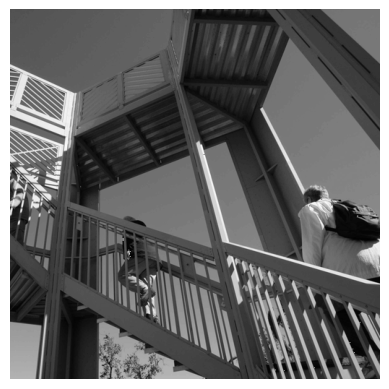

In [5]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(img)
plt.show()

In [6]:
img_transformed = np.copy(img)
size_x = img_transformed.shape[0]
size_y = img_transformed.shape[1]

Фильтры выделяют что-то особенное на картинке.

**Усредняющий фильтр**

In [7]:
filter_ = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
print(np.array(filter_).shape)
filter_

(3, 3)


array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

**Свертка**

In [8]:
def apply_filter(img, filter_):
    for x in range(1, size_x - 1):
        for y in range(1, size_y - 1):
            convolution = 0.0
            convolution = convolution + (img[x - 1, y-1] * filter_[0][0])
            convolution = convolution + (img[x, y-1] * filter_[0][1])
            convolution = convolution + (img[x + 1, y-1] * filter_[0][2])
            convolution = convolution + (img[x-1, y] * filter_[1][0])
            convolution = convolution + (img[x, y] * filter_[1][1])
            convolution = convolution + (img[x+1, y] * filter_[1][2])
            convolution = convolution + (img[x-1, y+1] * filter_[2][0])
            convolution = convolution + (img[x, y+1] * filter_[2][1])
            convolution = convolution + (img[x+1, y+1] * filter_[2][2])
            
            if convolution < 0:
                convolution = 0
            if convolution > 255:
                convolution = 255
            img_transformed[x, y] = convolution
            
    return img_transformed

In [9]:
def apply_filter(img, filter_):
    for x in range(1, size_x-1):
        for y in range(1, size_y-1):
            convolution = 0.0

            dimg = img[x-1:x+2, y-1:y+2] 
            convolution = np.sum(dimg * filter_)

            if convolution < 0:
                convolution = 0
            if convolution > 255:
                convolution = 255
            img_transformed[x, y] = convolution
    return img_transformed

In [10]:
def plot_image(img, img_transformed):
    # Plot the image. 512 by 512
    plt.figure(figsize=(15,7))
    plt.gray()
    plt.grid(False)
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.imshow(img_transformed)
    #plt.axis('off')
    plt.show()

    ymin,ymax,xmin,xmax = 100,150,0,50

    plt.figure(figsize=(15,7))
    plt.gray()
    plt.grid(False)
    plt.subplot(1,2,1)
    plt.imshow(img[ymin:ymax,xmin:xmax])
    plt.subplot(1,2,2)
    plt.imshow(img_transformed[ymin:ymax,xmin:xmax])
    #plt.axis('off')
    plt.show() 

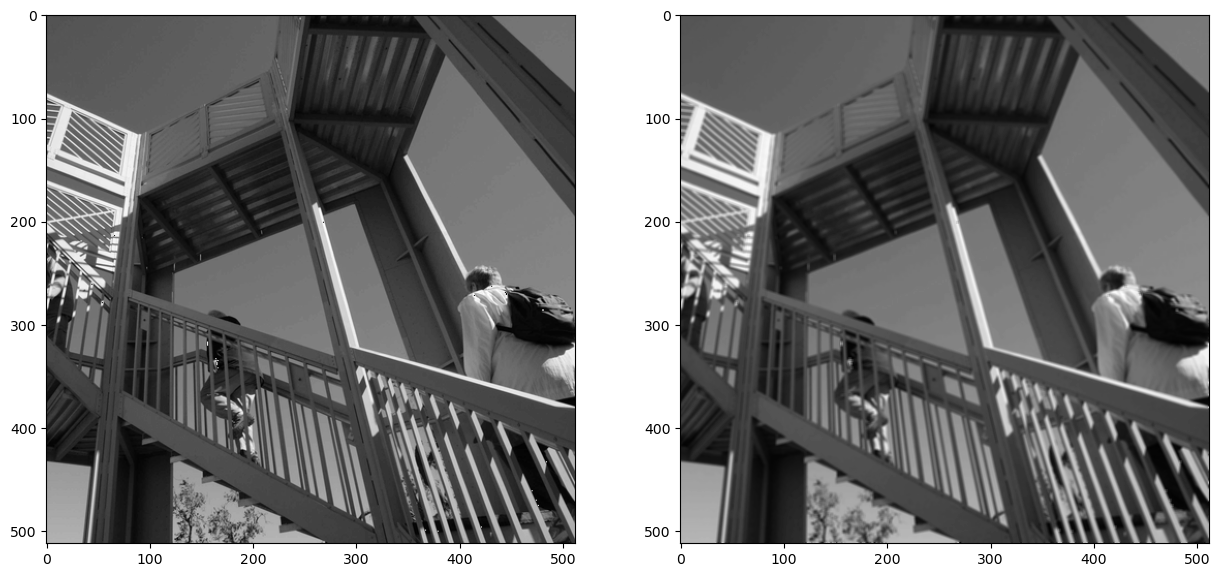

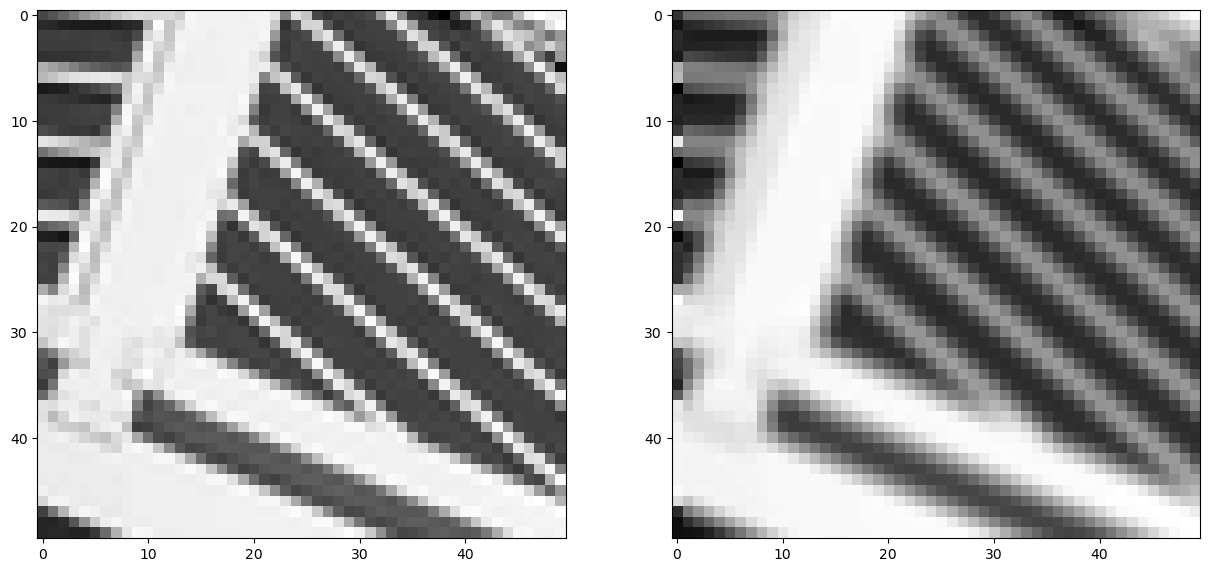

In [11]:
img_transformed = apply_filter(img, filter_)
plot_image(img, img_transformed)

**Фильтр улучшения чёткости**

In [12]:
filter_ = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
print(filter_.shape)
filter_

(3, 3)


array([[-1, -1, -1],
       [-1,  9, -1],
       [-1, -1, -1]])

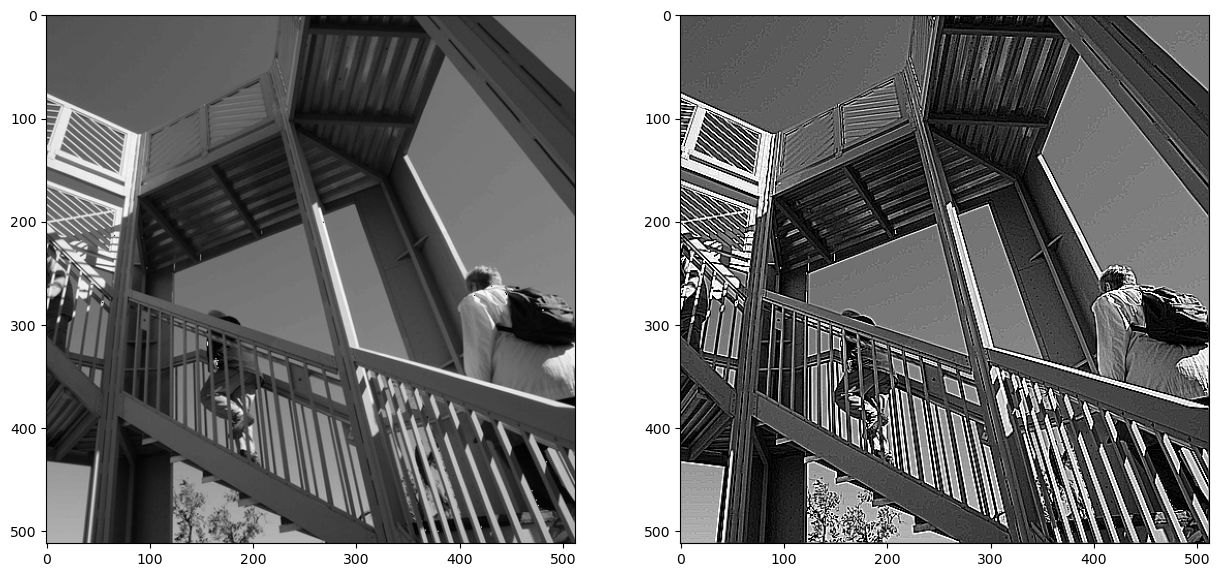

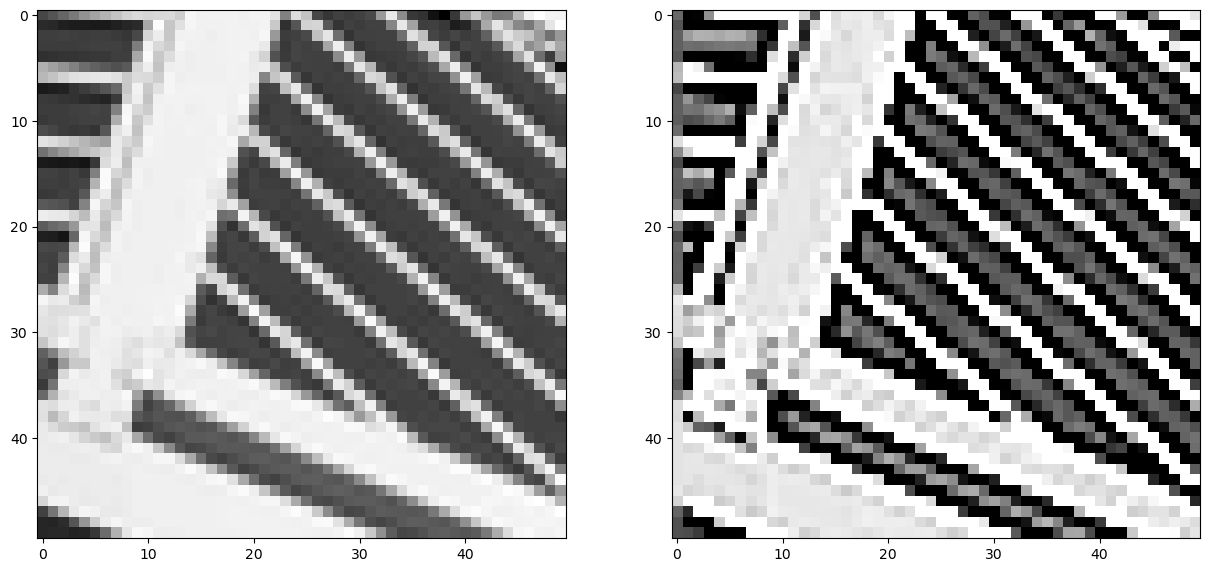

In [13]:
img_transformed = apply_filter(img, filter_)
plot_image(img, img_transformed)

**Фильтр Собеля**

Строка пикселей, которая выше текущего вычитается из строки, которая ниже. По сути, получаем производную в направлении по y, мы нашли все места, где идет переход от темного к светлому.

In [14]:
filter_ = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
print(filter_.shape)
filter_

(3, 3)


array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

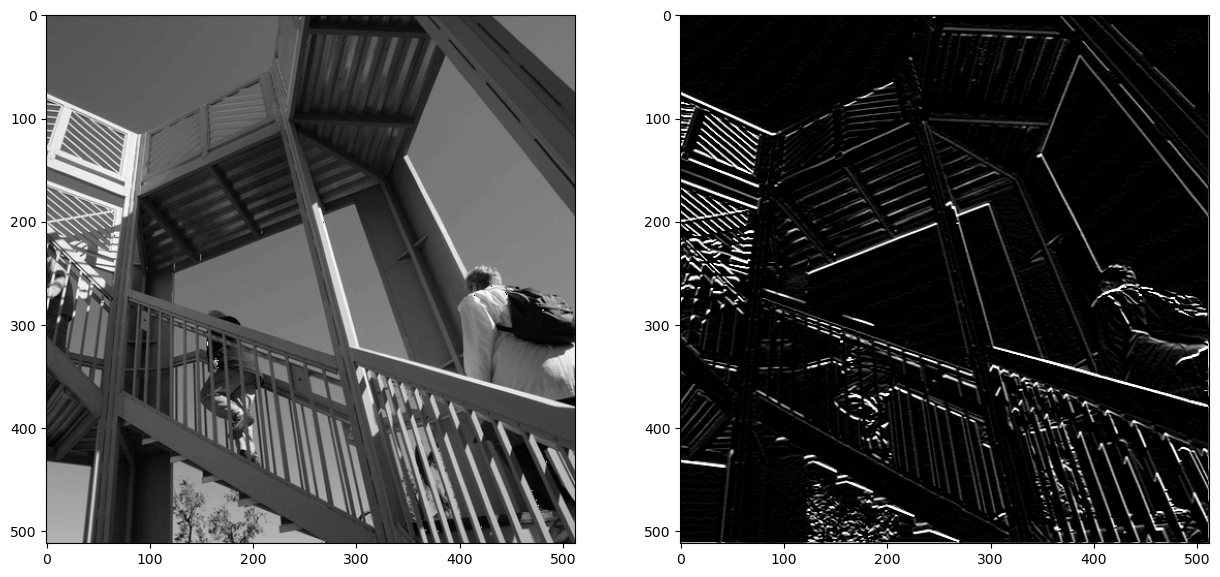

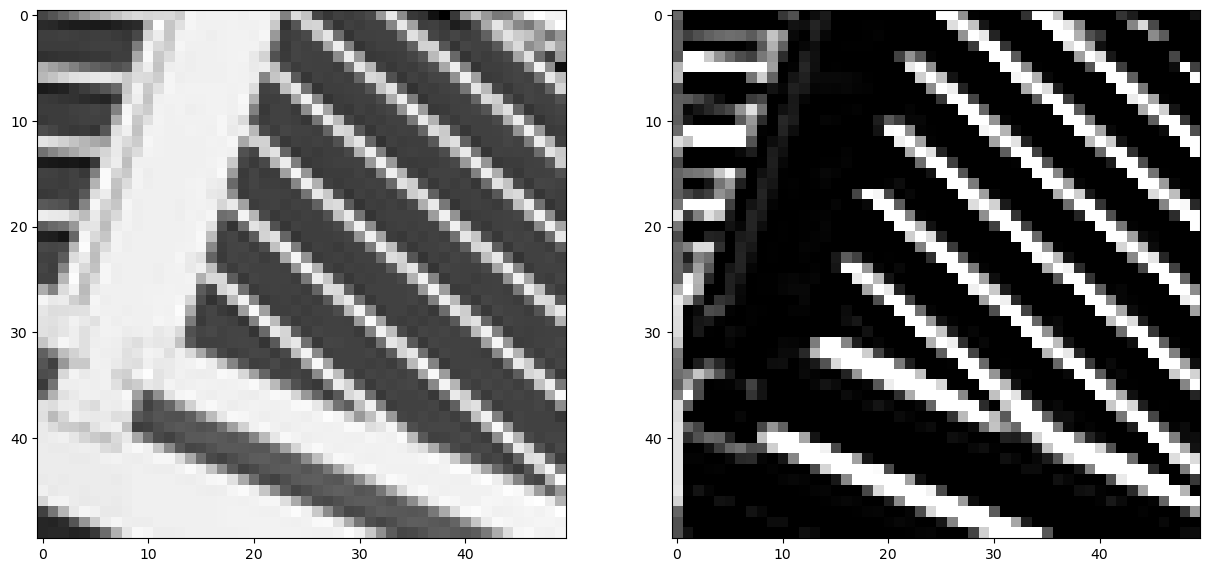

In [15]:
img_transformed = apply_filter(img, filter_)
plot_image(img, img_transformed)

Столбец пикселей, которая левее текущего вычитается из строки, которая правее. По сути, получаем производную в направлении по x, мы нашли все места, где идет переход от темного к светлому.

In [16]:
filter_= np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
print(filter_.shape)
filter_

(3, 3)


array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

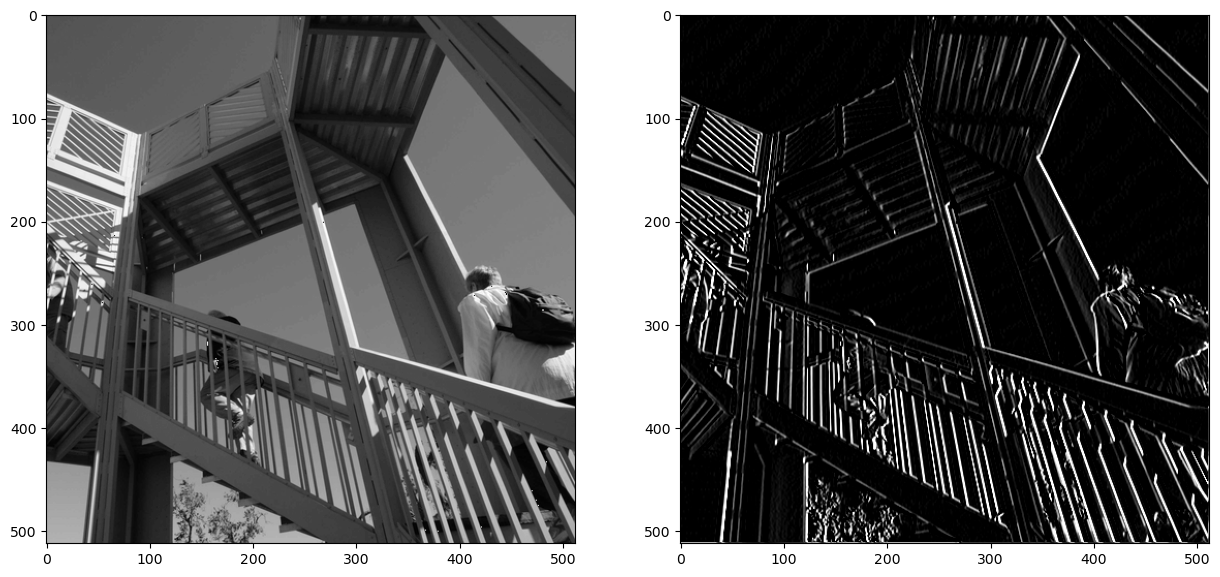

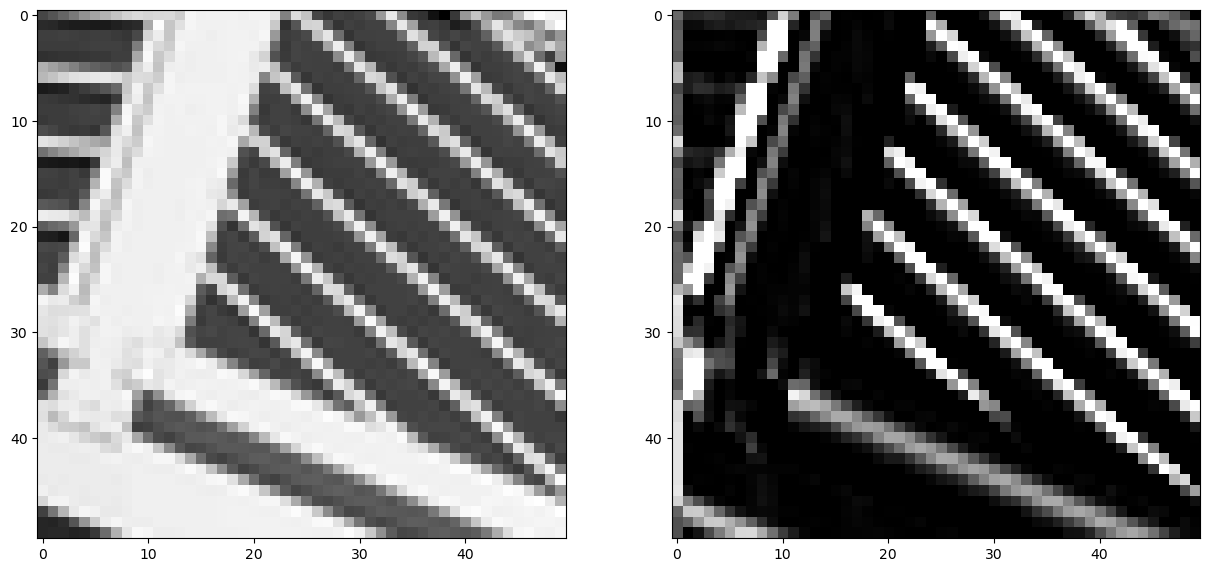

In [17]:
img_transformed = apply_filter(img, filter_)
plot_image(img, img_transformed)

**Фильтр Лапласа**

Выделяет те места, где было что-то яркое.

In [18]:
filter_ = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
print(filter_.shape)
filter_

(3, 3)


array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

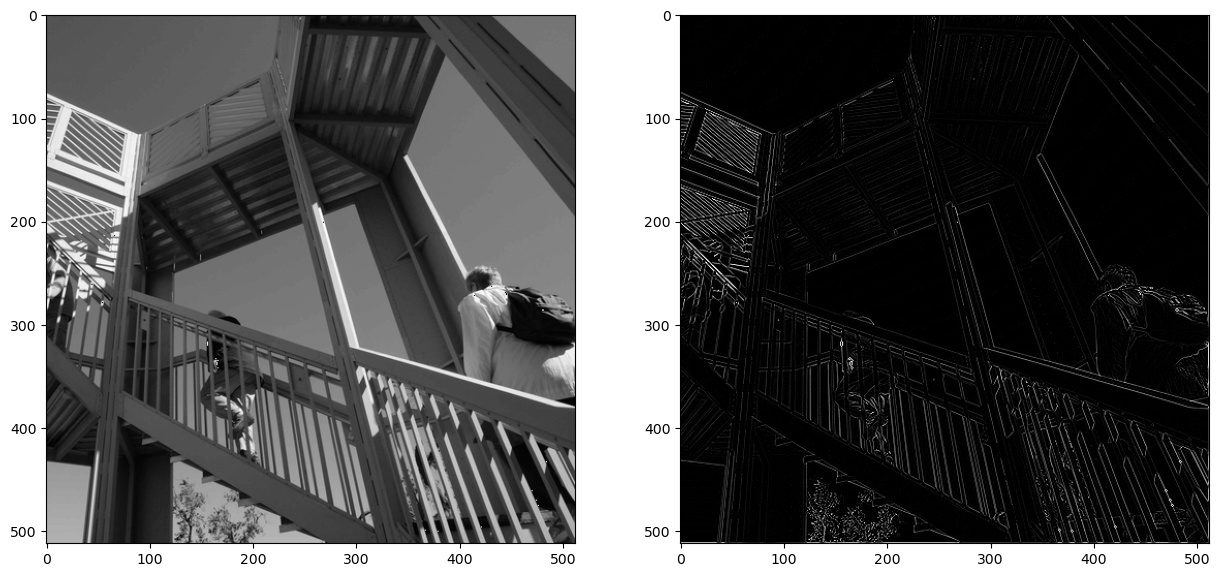

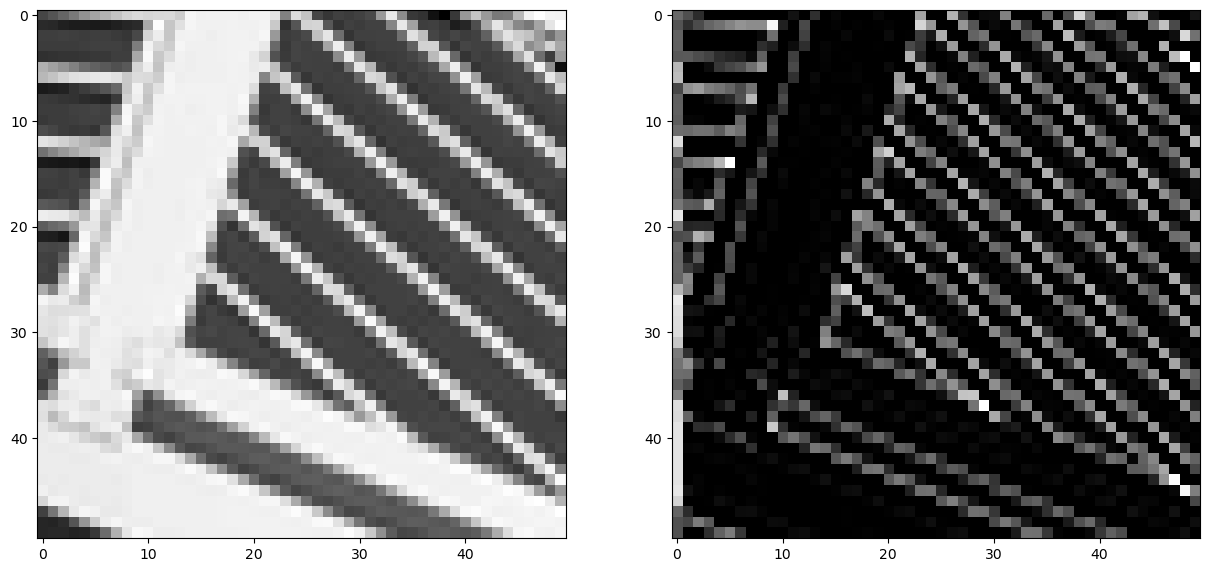

In [19]:
img_transformed = apply_filter(img, filter_)
plot_image(img, img_transformed)

**Обнаружение линий по горизонтали**

In [20]:
filter_ = np.array([[-1, -1, -1], [2,  2,  2], [-1, -1, -1]])
print(filter_.shape)
filter_

(3, 3)


array([[-1, -1, -1],
       [ 2,  2,  2],
       [-1, -1, -1]])

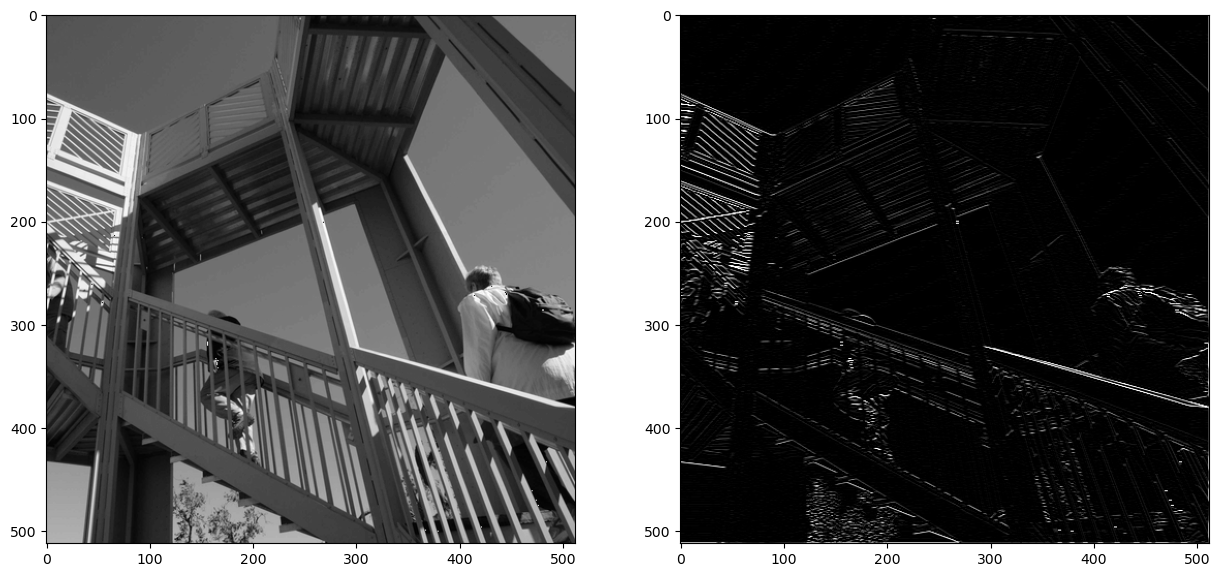

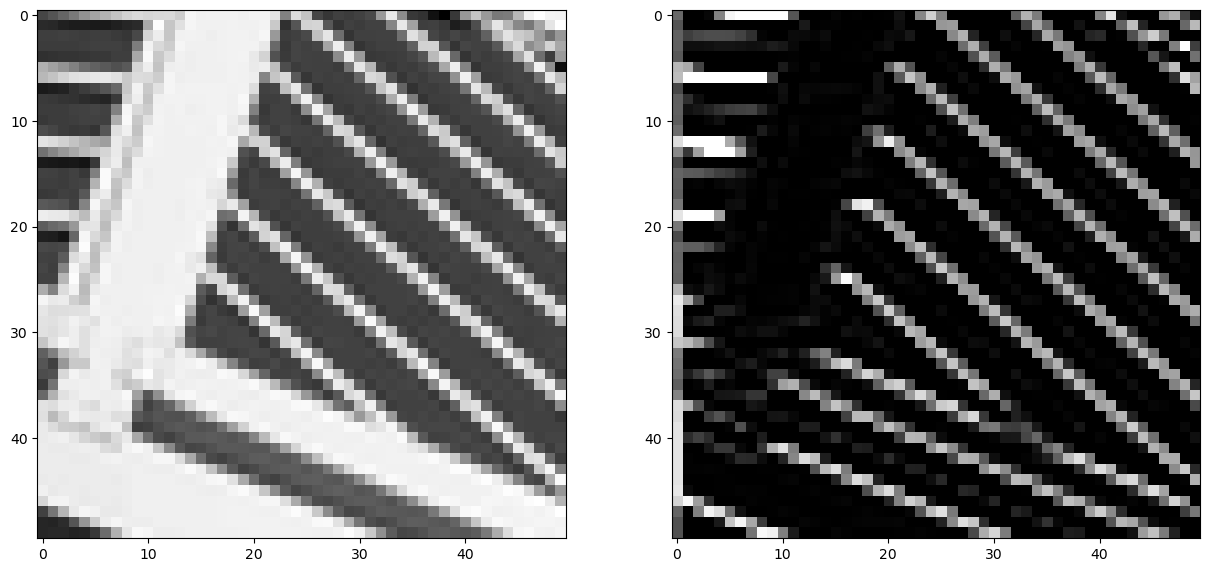

In [21]:
img_transformed = apply_filter(img, filter_)
plot_image(img, img_transformed)

Еще разные свертки можно посмотреть [здесь](https://desktop.arcgis.com/ru/arcmap/10.3/manage-data/raster-and-images/convolution-function.htm).

Смысл фильтров в том, чтобы выделить особенные места на изображении - признаки (карта признаков/feature map). К примеру, выше большей насыщенностью выделяются границы объектов, выделяются границы. Фильтры, которые смотрели до этого - придуманные.

А хотелось бы получать такие фильтры, которые достают признаки в зависимости от нашей задачи. И как раз сверточная нейронная сеть этим и занимается. Решается задача придумывания фильтра, подбора коэффициентов в нем.


В начальный момент в свертке случайные числа, но распространив её до выходов сети, далее выясняется, что не работает и с помощью метода обратного распространения ошибки идет исправления настраиваемых весов.


<img src='images/conv11.png'>

Пример работы сверточного слоя представляет из себя карту признаков.

<img src='images/feature_map.png' width=400px>

### Pooling

*Пуллинг* слои следуют за сверточными слоями и призваны очистить от лишней информации эти признаки и убрать у них локальную привязку. Сама операция пуллинга если говорить опять же упрощенно представляет из себя процесс отбрасывания менее значимых сигналов представленных в виде чисел.

Если всё время использовать только свертки, то в какой-то момент мы получим очень много признаков, но возможно столько признаков-то и не нужно. Имеет смысл сделать полученную информацию более общей. Poolling снижает размерность карты признаков, информация упрощается, с одной стороны хорошо - уменьшается размер данных, но с другой - мелкие детали теряются.


**MaxPooling**

<img src='images/maxpool_animation.gif'>

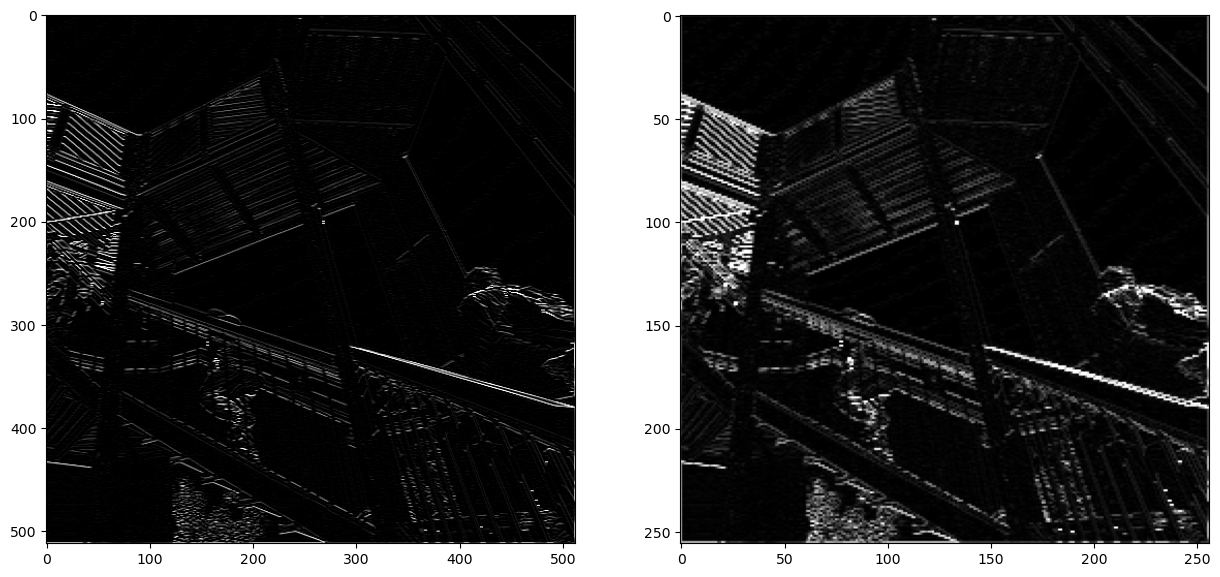

In [22]:
new_x = int(size_x / 2)
new_y = int(size_y / 2)
new_img = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(img_transformed[x, y])
        pixels.append(img_transformed[x+1, y])
        pixels.append(img_transformed[x, y+1])
        pixels.append(img_transformed[x+1, y+1])
        new_img[int(x/2), int(y/2)] = np.max(pixels)


plt.figure(figsize=(15,7))
plt.gray()
plt.grid(False)

plt.subplot(1,2,1)
plt.imshow(img_transformed)
plt.subplot(1,2,2)
plt.imshow(new_img)
plt.show()

Размер изображения уменьшился, но основная идея осталась, все пиксели с наибольшей интенсивностью сохранились.

**AveragePooling**

<img src='images/average_pooling.gif'>

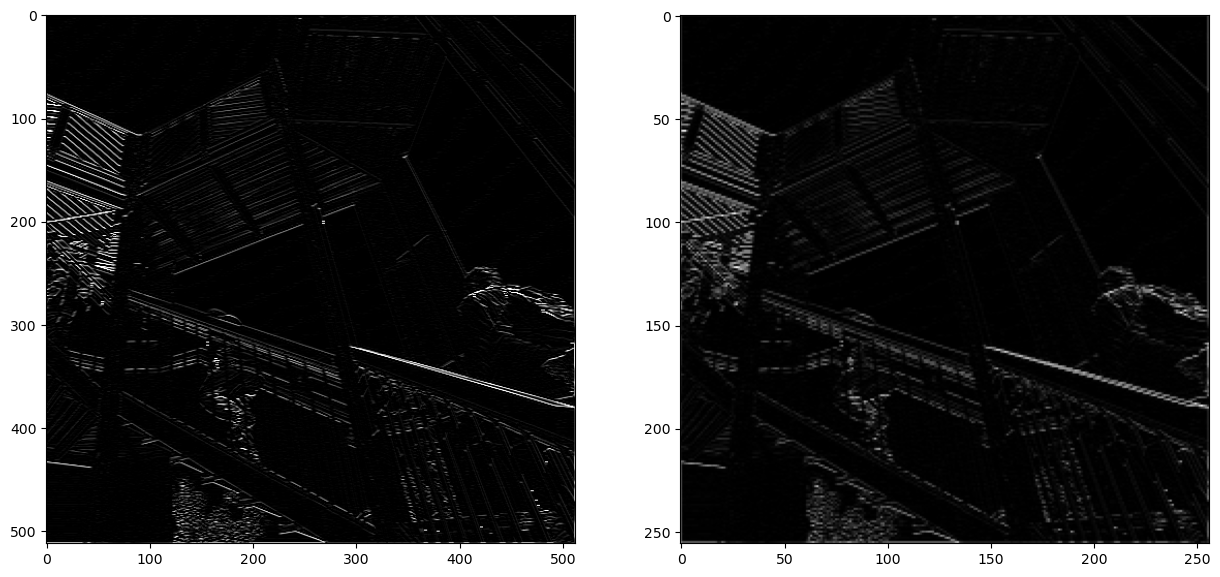

In [23]:
new_x = int(size_x / 2)
new_y = int(size_y / 2)
new_img = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(img_transformed[x, y])
        pixels.append(img_transformed[x+1, y])
        pixels.append(img_transformed[x, y+1])
        pixels.append(img_transformed[x+1, y+1])
        new_img[int(x/2), int(y/2)] = np.mean(pixels)


plt.figure(figsize=(15,7))
plt.gray()
plt.grid(False)

plt.subplot(1,2,1)
plt.imshow(img_transformed)
plt.subplot(1,2,2)
plt.imshow(new_img)
plt.show()

**SumPooling**

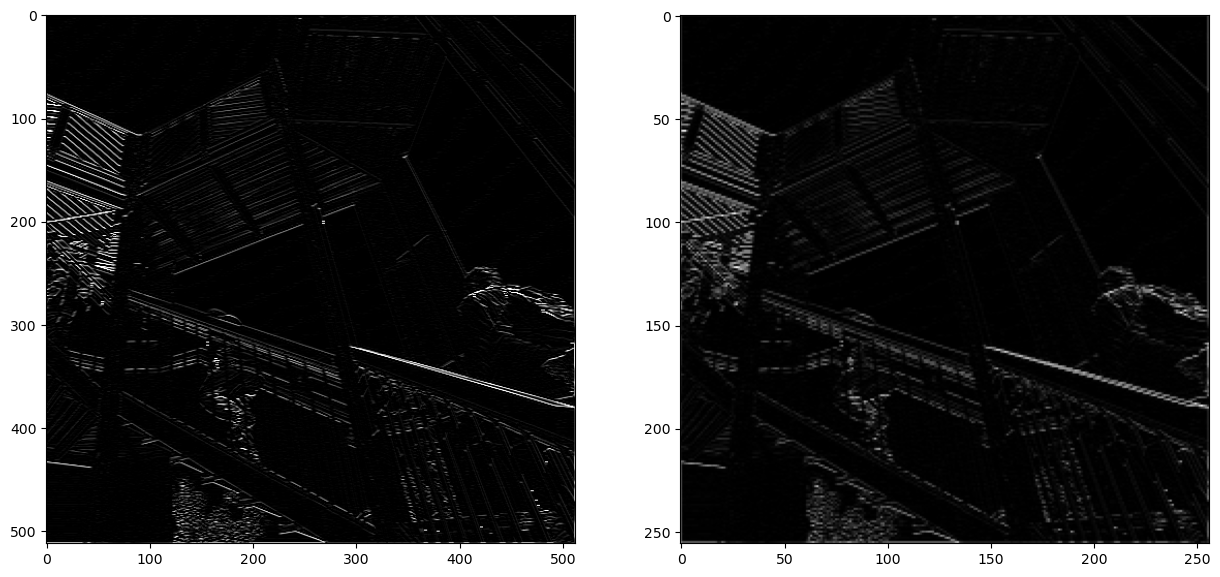

In [24]:
new_x = int(size_x / 2)
new_y = int(size_y / 2)
new_img = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(img_transformed[x, y])
        pixels.append(img_transformed[x+1, y])
        pixels.append(img_transformed[x, y+1])
        pixels.append(img_transformed[x+1, y+1])
        new_img[int(x/2), int(y/2)] = np.sum(pixels)


plt.figure(figsize=(15,7))
plt.gray()
plt.grid(False)

plt.subplot(1,2,1)
plt.imshow(img_transformed)
plt.subplot(1,2,2)
plt.imshow(new_img)
plt.show()

## Пример создания сверточных и пуллинг слоев на Keras

Все выше перечисленные слои имеют разные представления (Conv1D, Conv2D, Conv3D). Мы будем работать с Conv2D, что подразумевает наличие канала. Изображение, которое обрабатывается сверткой имеет размерность (width, height, channels).

Conv2D принимает на вход (bs, width, height, channels). Удобно для изображений<br>

bs - биас, сдвиг
padding - граничные точки, мы можем их добавить чтоб размерность на выходе не падала, установив padding=same

In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 

In [26]:
# создание модели
# 1 канал цвета (чб изображение)
x_input = Input(shape=(6, 6, 1))
x_conv = Conv2D(1, (3, 3), activation='relu', padding='same')(x_input)
x_pool = AveragePooling2D()(x_conv)

model = Model(x_input, x_pool)
model_conv = Model(x_input, x_conv)

# вывод описания созданной модели
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6, 6, 1)]         0         
                                                                 
 conv2d (Conv2D)             (None, 6, 6, 1)           10        
                                                                 
 average_pooling2d (AverageP  (None, 3, 3, 1)          0         
 ooling2D)                                                       
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


**Padding**

<img src='images/padding.png'>

padding='valid'. Размерность new_x = x - kernel_size + 1<br>
padding='same'. Размерность new_x = x

**Stride**

<img src='images/stride.gif'>

Stride - Шаг свертки

In [27]:
w_old = model.layers[-2].get_weights()
w_old

[array([[[[-0.08318335]],
 
         [[-0.0639503 ]],
 
         [[ 0.0106889 ]]],
 
 
        [[[ 0.5638288 ]],
 
         [[-0.35614425]],
 
         [[-0.36626518]]],
 
 
        [[[ 0.14189345]],
 
         [[ 0.1632607 ]],
 
         [[ 0.44973373]]]], dtype=float32),
 array([0.], dtype=float32)]

In [28]:
# создание модели
x_input = Input(shape=(512, 512, 1))
x_conv = Conv2D(1, (3, 3), activation='relu', padding='same')(x_input)
x_pool = MaxPooling2D(pool_size=(2, 2))(x_conv)

model1 = Model(x_input, x_pool)
model_conv1 = Model(x_input, x_conv)

# вывод описания созданной модели
model1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 1)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 512, 512, 1)       10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 1)      0         
 )                                                               
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 61ms/step
Входной тензор


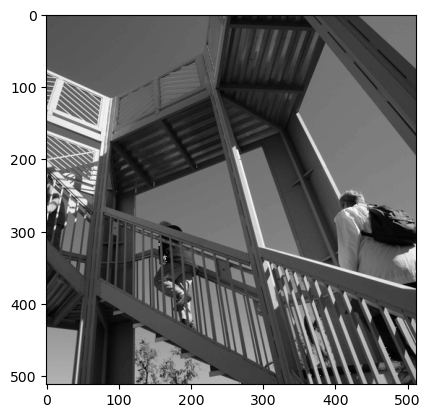

Результат свертки


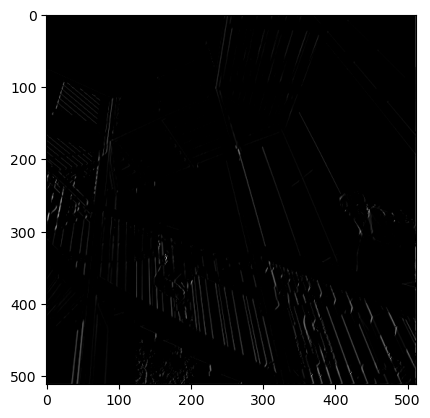

размерность входа (512, 512)
размерность выхода свертки (1, 512, 512, 1)
Результат пулинга


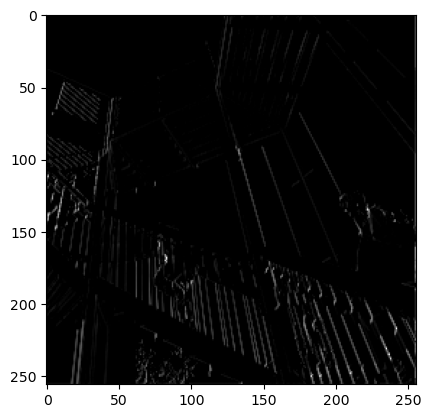

размерность выхода пулинга (1, 256, 256, 1)


In [29]:
y_conv1 = model_conv1.predict(img.reshape((1,512,512,1)))
y_pool1 = model1.predict(img.reshape((1,512,512,1)))
print('Входной тензор')

plt.imshow(img)
plt.show()
print('Результат свертки')

plt.imshow(y_conv1[0, ..., 0])
plt.show()

print('размерность входа', img.shape)
print('размерность выхода свертки', y_conv1.shape)

print('Результат пулинга')

plt.imshow(y_pool1[0, ..., 0])
plt.show()
print('размерность выхода пулинга', y_pool1.shape)

Для разных каналов могут быть разные свертки!


<img src='images/4.gif'>

In [30]:
model = Sequential([
    Conv2D(3, (3, 3), padding='same', input_shape=(8, 8, 2)), # 3 фильтра(свертки), ядро 3х3, входное значение 8х8 с 2 каналами
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 8, 8, 3)           57        
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [31]:
model = Sequential([
    Conv2D(2, (2, 2), padding='same', input_shape=(8, 8, 3)), # 3 фильтра, ядро 3х3, входное значение 8х8 с 3 каналами
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 8, 8, 2)           26        
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Conv2D(2, (2, 2), padding='same', input_shape=(8, 8, 3)),
# 1 канал - 4 + 4 (2x2 с 2 фильтрами)
# 2 канал - 4 + 4 (2x2 с 2 фильтрами)
# 3 канал - 4 + 4 (2x2 с 2 фильтрами)
#           1   1 (каждому фильтру +1 bias)


# Conv2D(3, (3, 3), padding='same', input_shape=(8, 8, 2)),
# 1 канал - 9 + 9 + 9 (3x3 с 3 свертками)
# 2 канал - 9 + 9 + 9 (3x3 с 3 свертками)
#           1   1   1 (каждой свертке +1 bias)

У каждой свертки (фильтра) есть параметр bias, поэтому +1 не забываем

## Нейронная сеть Lenet5.

Lenet5 - это одна из первых сверточных нейронных сетей и она отражает характерные для сверточных нейронных сетей набор элементов - сверточные слои, пуллинг слои и полносвязные слои на конце нейронной сети. Данная архитектура послужила основой для многих современных архитектур сверточных нейронных сетей.

<img src='images/lnet5.png'>

In [33]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
import tensorflow.keras as keras


# загрузка тренировочных и тестовых данных
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# нормализация данных [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# трансформация лейблов в one-hot encoding
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [34]:
# инициализация пустой модели
model = Sequential()
# первый сверточный слой
model.add(layers.Conv2D(6, (5, 5), strides=(1, 1),
                        activation='tanh',
                        input_shape=(28, 28, 1),
                        padding="valid"))
# второй пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2),
                                  strides=(1, 1),
                                  padding='same'))
# третий сверточный слой
model.add(layers.Conv2D(16, (5, 5), strides=(1, 1),
                        activation='tanh',
                        padding='valid'))

# четвертый пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2),
                                  strides=(2, 2),
                                  padding='same'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязному слою
model.add(layers.Flatten())

# полносвязный слой
model.add(layers.Dense(120, activation='tanh'))
# полносвязный слой
model.add(layers.Dense(84, activation='tanh'))

# выходной слой с функцией активации softmax
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_1 (Averag  (None, 24, 24, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 16)        2416      
                                                                 
 average_pooling2d_2 (Averag  (None, 10, 10, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 120)              

Сверточные слои маленькие, у них не так много параметров, как у полносвязных слоев.

In [35]:
# компиляция модели
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='SGD',
              metrics=["accuracy"])


hist = model.fit(X_train, y_train,
                 epochs=2,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/2
469/469 [==============================] - 4s 5ms/step - loss: 0.8217 - accuracy: 0.7969 - val_loss: 0.3943 - val_accuracy: 0.8959
Epoch 2/2
469/469 [==============================] - 2s 5ms/step - loss: 0.3527 - accuracy: 0.9031 - val_loss: 0.2975 - val_accuracy: 0.9171


In [36]:
test_loss, test_metric = model.evaluate(X_test, y_test)
print(f"Test loss {test_loss:.4f}, accuracy {test_metric:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.2975 - accuracy: 0.9171
Test loss 0.2975, accuracy 0.92%


In [37]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


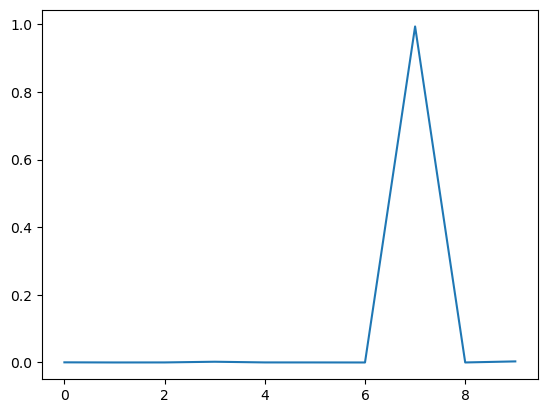

[4.0435331e-04 5.1792747e-05 1.3843576e-04 2.1960712e-03 1.6446755e-04
 1.2002114e-04 4.4833123e-06 9.9367332e-01 5.8497542e-05 3.1884618e-03]


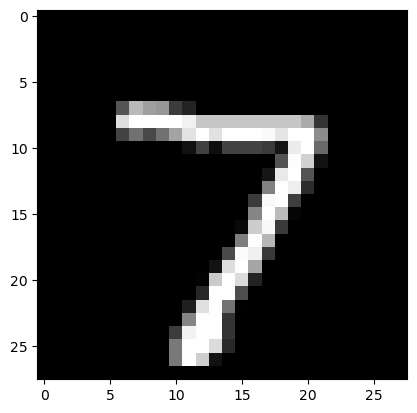

In [38]:
plt.plot(y_pred[0][:])
plt.show()
print(y_pred[0][:])
plt.imshow(X_test[0][:,:,0])
plt.show()

Построим примерно такую же сеть через функциональное описание

In [39]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# загрузка тренировочных и тестовых данных
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# нормализация данных [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# трансформация лейблов в one-hot encoding
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [40]:
from tensorflow.keras.models import Model 
# инициализация  модели
input1 = layers.Input(shape=(28, 28, 1))
# первый сверточный слой
x1 = layers.Conv2D(6, (5, 5), strides=(1, 1),
                   activation='tanh',
                   padding="valid")(input1)

# второй пуллинговый слой
x2 = layers.AveragePooling2D(pool_size=(2, 2),
                             strides=(1, 1),
                             padding='same')(x1)

# третий сверточный слой
x3 = layers.Conv2D(16, (5, 5), strides=(1, 1),
                   activation='tanh',
                   padding='valid')(x2)

# четвертый пуллинговый слой
x4 = layers.AveragePooling2D(pool_size=(2, 2),
                             strides=(2, 2),
                             padding='same')(x3)
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x5 = layers.Flatten()(x4)

# полносвязный слой
x6 = layers.Dense(120, activation='tanh')(x5)
# полносвязный слой
x7 = layers.Dense(84, activation='tanh')(x6)

# выходной слой с функцией активации softmax
out_x = layers.Dense(10, activation='softmax')(x7)


# Соберем полную модель сети от входа к выходу 
model = Model(inputs=input1, outputs=out_x)

# сделаем несколько промежуточных выходов (через них посмотрим, что происходит в сети) 
model1 = Model(inputs=input1, outputs=x1)
model3 = Model(inputs=input1, outputs=x3)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_3 (Averag  (None, 24, 24, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 20, 16)        2416      
                                                                 
 average_pooling2d_4 (Averag  (None, 10, 10, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0   

In [41]:
# компилияция модели
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='SGD',
              metrics=["accuracy"])

# Обучаем модель
hist = model.fit(X_train, y_train,
                 epochs=2,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 verbose=1)

test_loss, test_metric = model.evaluate(X_test, y_test)
print(f"Test loss {test_loss:.4f}, accuracy {test_metric:.2f}%")

Epoch 1/2
469/469 [==============================] - 3s 5ms/step - loss: 1.0365 - accuracy: 0.6551 - val_loss: 0.7137 - val_accuracy: 0.7391
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.6113 - accuracy: 0.7727
Test loss 0.6113, accuracy 0.77%


Сделаем предикт для примеров тестов

In [42]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


Подглядываем в первый сверточный слой

313/313 [==============================] - 0s 1ms/step


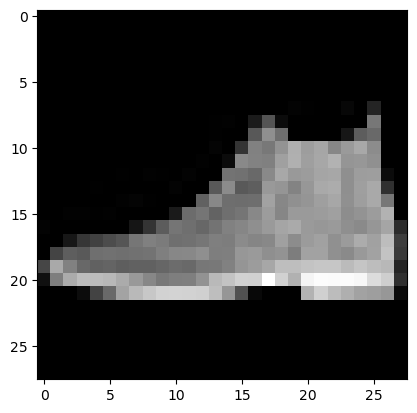

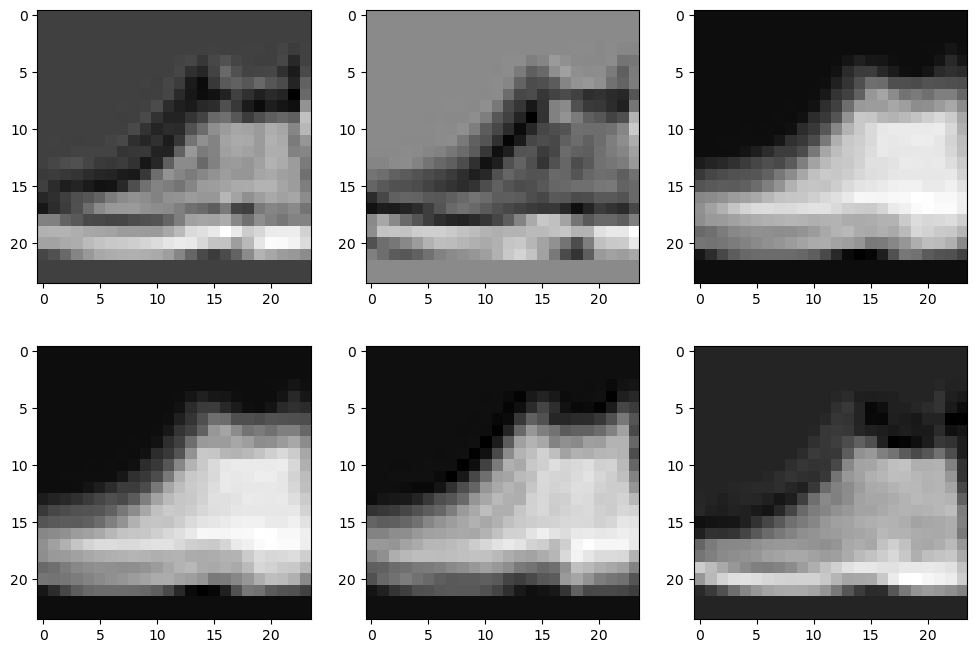

In [43]:
b = model1.predict(X_test)

n = 0
plt.imshow(X_test[n, ..., 0])
plt.show()

plt.figure(figsize=(12, 8))
for i in range(2):
    for j in range(3):
        plt.subplot(2,3,i*3+j+1)
        plt.imshow(b[n][:,:,i*2+j])
plt.show()

Подглядываем в третий сверточный слой

In [44]:
b3 = model3.predict(X_test[:10])
b3.shape

1/1 [==============================] - 0s 212ms/step


(10, 20, 20, 16)

Содержание внутреннего слоя 

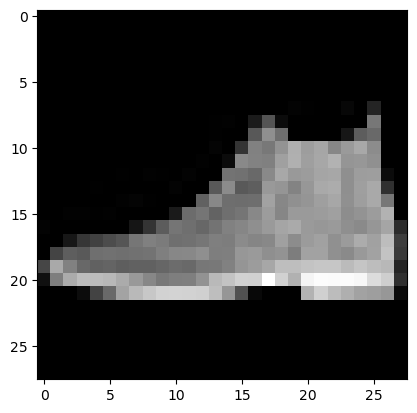

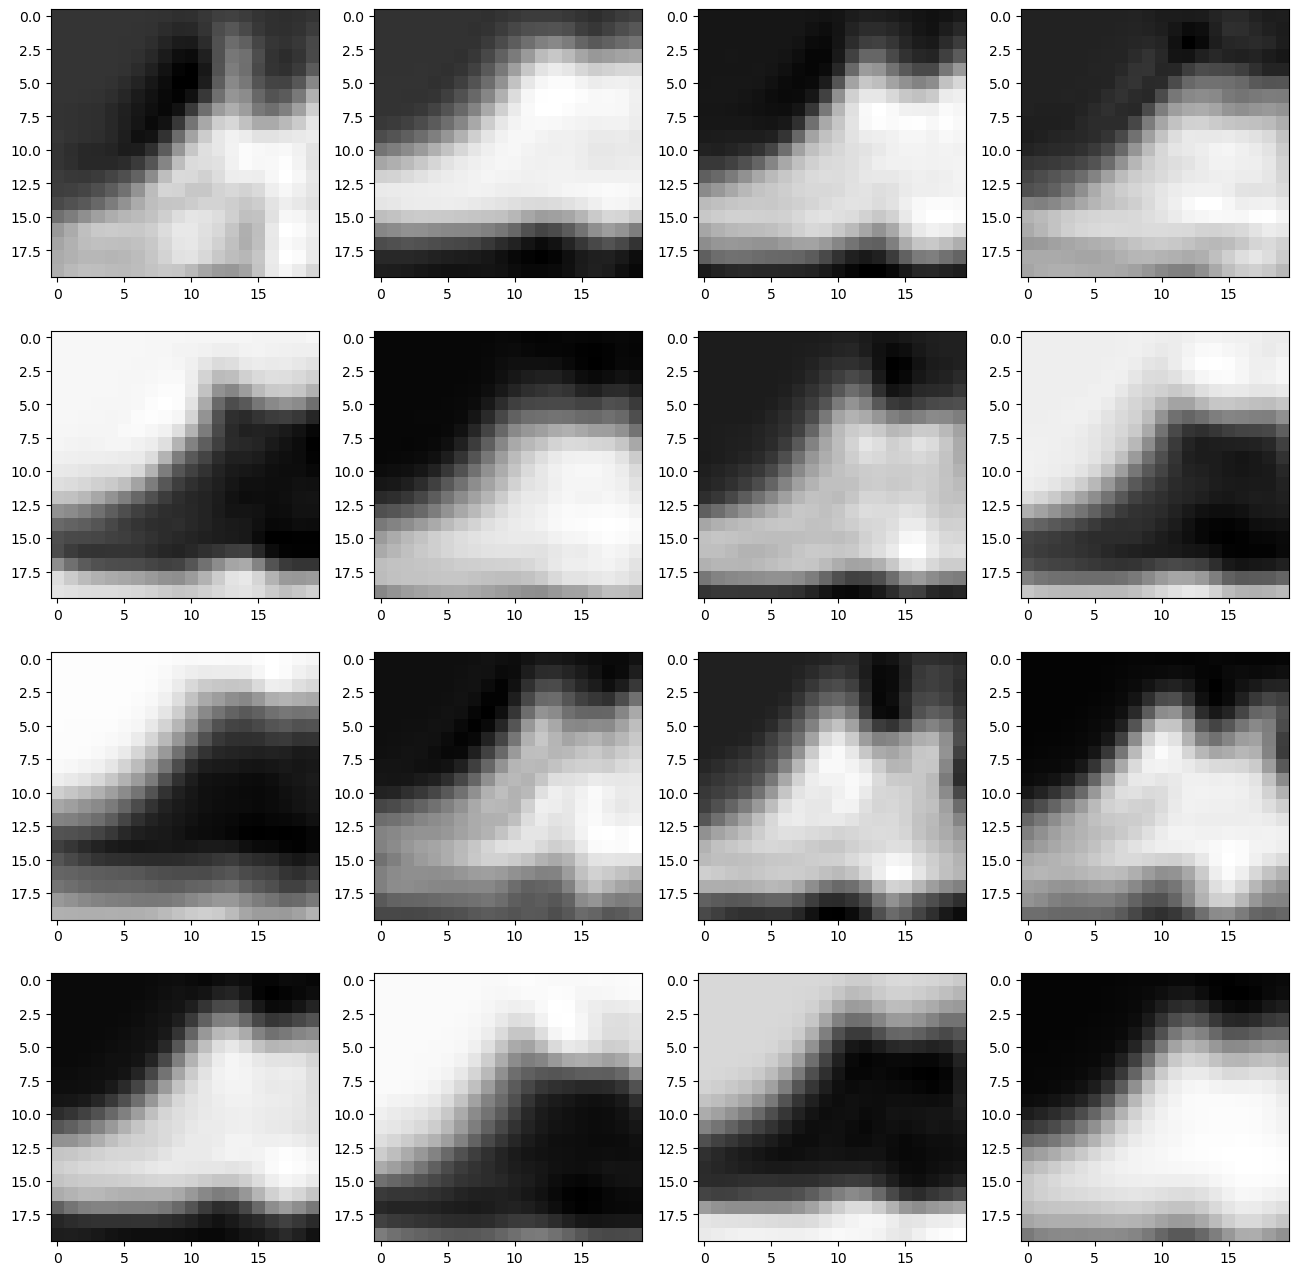

In [45]:
n = 0
plt.imshow(X_test[n,:,:,0])
plt.show()

plt.figure(figsize=(16,16))
for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.imshow(b3[n][:,:,i*4+j])
plt.show()

Сделаем ссылку для обращения к слою

In [46]:
model3_layer = model3.get_layer(index=-1)
model3.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_3 (Averag  (None, 24, 24, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 20, 16)        2416      
                                                                 
Total params: 2,572
Trainable params: 2,572
Non-trainable params: 0
_________________________________________________________________


Получим веса слоя

In [47]:
w_ = model3_layer.get_weights()

Размер ядер слоя

In [48]:
w_[0].shape

(5, 5, 6, 16)

Сами ядра

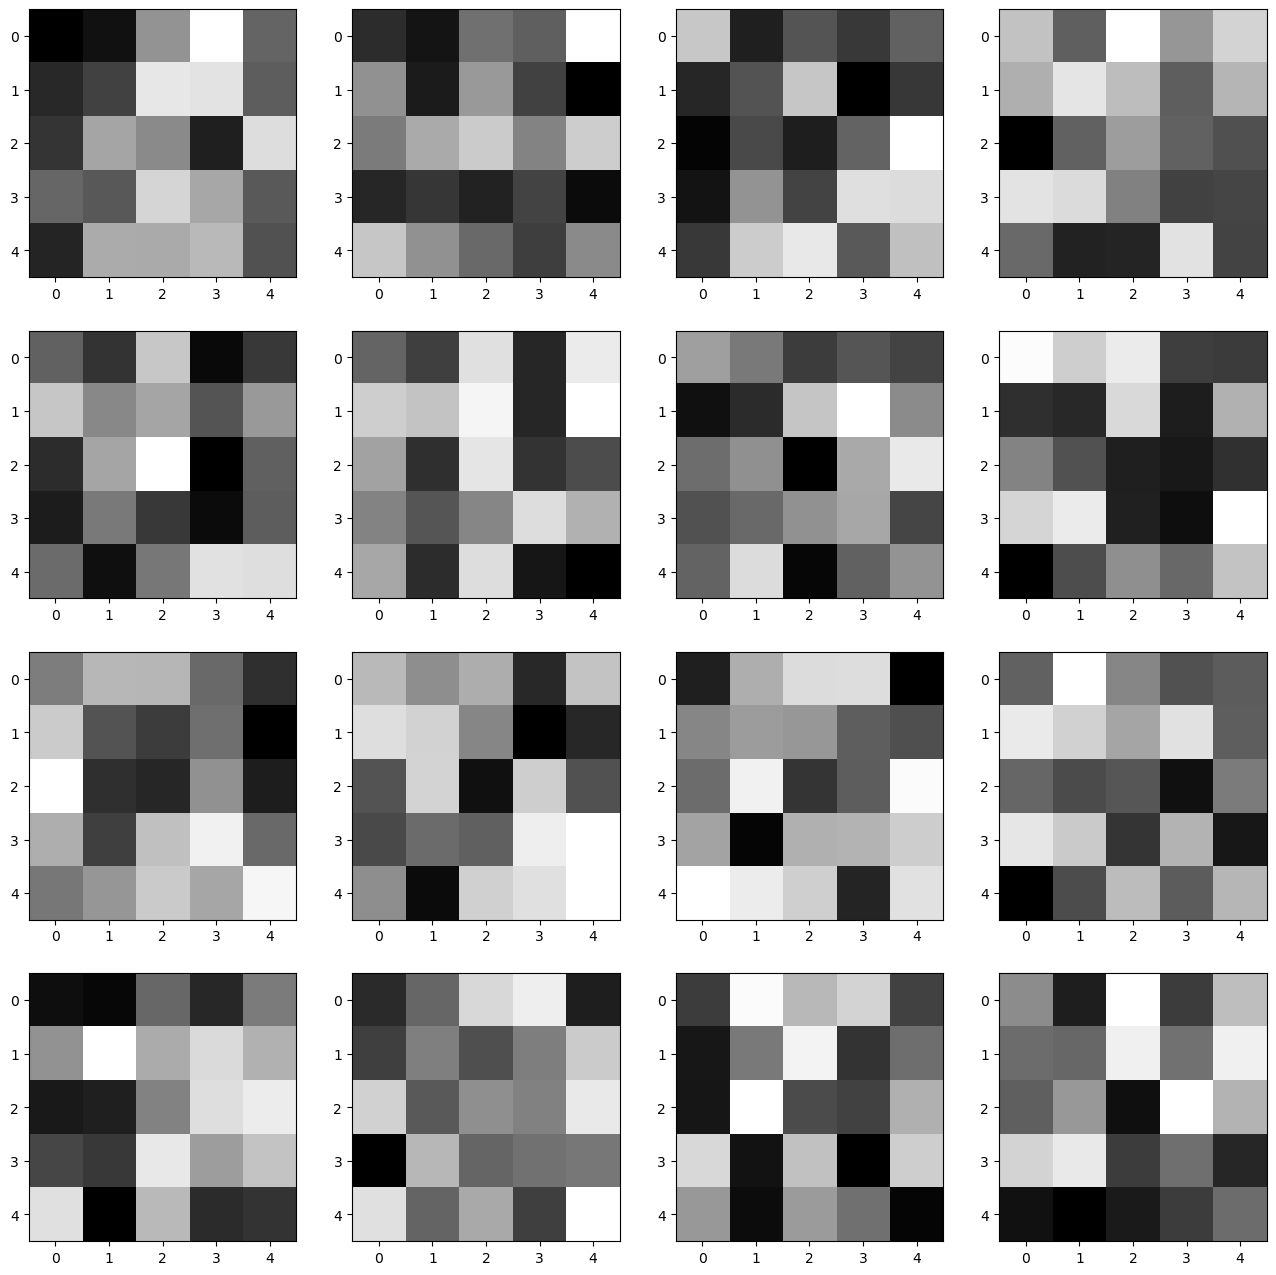

In [49]:
plt.figure(figsize=(16, 16))
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i*4+j+1)
        plt.imshow(w_[0][..., 0, i*4+j])
plt.show()

In [50]:
w_[0][..., 0, 15]

array([[ 0.00598135, -0.07526948,  0.09055524, -0.05254265,  0.04273088],
       [-0.01816656, -0.0217078 ,  0.07927269, -0.0132754 ,  0.07960343],
       [-0.02751062,  0.01426899, -0.08620074,  0.09085617,  0.03428874],
       [ 0.05901681,  0.07418513, -0.05317901, -0.01583965, -0.06981152],
       [-0.08484128, -0.09785299, -0.07817088, -0.0522928 , -0.01753908]],
      dtype=float32)

## Пример на Keras более сложной сверточной нейронной сети

In [51]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

### Dropout

Метод регуляризации искусственных нейронных сетей, предназначен для уменьшения переобучения сети за счет предотвращения сложных адаптаций отдельных нейронов на тренировочных данных во время обучения.

Характеризует исключение определённого процента (например 50%) случайных нейронов на разных итерациях во время обучения нейронной сети. В результате  обучение происходит более общее, нет надежды на определенные нейроны. Такой приём значительно увеличивает скорость обучения, качество обучения на тренировочных данных, а также повышает качество предсказаний модели на новых тестовых данных.

На моменте предсказания все нейроны включаются обратно, dropout не используется.

<img src='images/dropout.png'>

In [52]:
from keras.layers import Dropout
Dropout(rate=0.5)

### Batch Normalization

Batch Normalization (Пакетная нормализация) — метод, который позволяет повысить производительность и стабилизировать работу искусственных нейронных сетей. Суть данного метода заключается в том, что некоторым слоям нейронной сети на вход подаются данные, предварительно обработанные и имеющие нулевое мат. ожидание и единичную дисперсию.

Batch norm дает следующие эффекты:

- ускорение сходимости модели;
- бОльшая независимость обучения каждого слоя нейронов;
- в некоторой степени предотвращает эффект переобучения;
- меньшая чувствительность к начальной инициализации весовых коэффициентов.


<img src='images/batch_norm.jpg'>

Получается, что нейронам в одной сети приходится адаптироваться к разным картинкам на разных итерациях, потому что разные статистические показатели распределений приходят на вход, из-за чего снижается скорость сходимости, чтобы это было легче для сети, можно выполнять нормализацию батча.

Получается, что нужно нормировать статистические показатели. 

<img src='images/batch_norm_sum.jpg'>


<h2>$z^i_k = \frac{v^i_k - m_v}{\sqrt{ \sigma^2_v+ \epsilon}}$</h2><br>
$y_i^k = \gamma z_i^k + \beta$, где $\gamma$ и $\beta$ - это настраиваемые параметры, которые нужны для дополнительного масштабирования и смещения.






In [53]:
from keras.layers import BatchNormalization

Sequential([
    BatchNormalization(input_shape=(8, 8, 2))
]).summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 8, 8, 2)          8         
 ormalization)                                                   
                                                                 
Total params: 8
Trainable params: 4
Non-trainable params: 4
_________________________________________________________________


Давайте теперь попробуем сделать несколько усложненный вариант нейронной сети разобранной ранее. В ней будет на несколько слоев больше и в ней будет использоваться data augumentation, процедура позволяющая за счет искажений изображений увеличить количество тренировочных данных, а как мы знаем чем больше тренировочных данных тем лучше будет работать нейросеть. Для обучения нейросети будем использовать датасет cifar-10. В нем 10 категорий объектов, например - лошадь, лягушка, корабль. Данный датасет уже более сложен для нейронных сетей чем mnist, однако он намного проще датасетов наподобие imagenet где используются сотни классов и архитектуры нейронных сетей для подобных датасетов также понадобяться более сложные.

In [54]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

Cifar-10: 40k картинок

In [55]:
# установка параметров нейросети
batch_size = 512
num_classes = 10
epochs = 5
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


X_train = X_train / 255.0
X_test = X_test / 255.0

170498071/170498071 [==============================] - 62s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


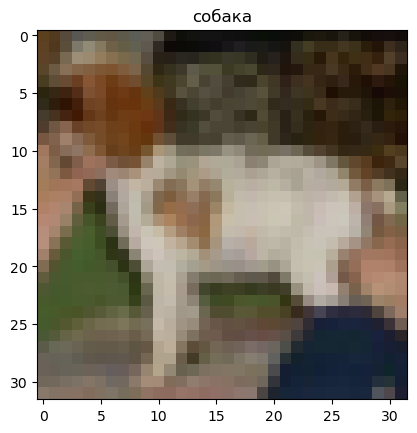

In [56]:
N = 12

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

In [57]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()
# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 32)        0         
                                                      

### Аугментация

Под аугментацией данных понимается увеличение выборки данных для обучения через модификацию существующих данных. Учитывая ресурсы на разметку изображений, для задачи распознавания объектов аугментация может быть крайне полезна.

Функции аугментаций делятся на следующие типы:
- операции с цветом (подкрутить цветовые каналы, увеличение контраста или яркости)
- геометрические операции (повернуть изображение, отразить изображение и т.п.)

<img src='images/augmentation.png'>

In [58]:
data_augmentation = True

In [59]:
if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=10, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0.2, 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)


    train_gen = datagen.flow(X_train, 
                             y_train,
                             batch_size=batch_size)

    # запуск data augmentation через fit_generator
    model.fit(train_gen,
              epochs=epochs,
              validation_data=(X_test, y_test))

Использование data augmentation
Epoch 1/5
98/98 [==============================] - 19s 181ms/step - loss: 2.3032 - accuracy: 0.1032 - val_loss: 2.2988 - val_accuracy: 0.1410
Epoch 2/5
98/98 [==============================] - 17s 174ms/step - loss: 2.2983 - accuracy: 0.1190 - val_loss: 2.2935 - val_accuracy: 0.1759
Epoch 3/5
98/98 [==============================] - 17s 176ms/step - loss: 2.2906 - accuracy: 0.1359 - val_loss: 2.2818 - val_accuracy: 0.1719
Epoch 4/5
98/98 [==============================] - 17s 175ms/step - loss: 2.2723 - accuracy: 0.1523 - val_loss: 2.2463 - val_accuracy: 0.1791
Epoch 5/5
98/98 [==============================] - 17s 174ms/step - loss: 2.2157 - accuracy: 0.1753 - val_loss: 2.1427 - val_accuracy: 0.2143


In [60]:
# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
    
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print(f'сохранить обученную модель как {model_path}')

# проверка работы обученной модели
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

сохранить обученную модель как D:\GeekBrains AI Institute\JupyterNotebooks\Neural Networks\Introduction to Neural Networks\04 cnn\saved_models\keras_cifar10_trained_model.h5
313/313 [==============================] - 1s 3ms/step - loss: 2.1427 - accuracy: 0.2143
Test loss: 2.142676591873169
Test accuracy: 0.2143000066280365


Что вернет ImageDataGenerator

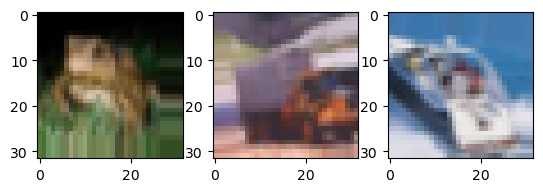

In [61]:
for batch in train_gen:
    imgs = batch[0]
    labels = batch[1]
    plt.subplot(131)
    plt.imshow(imgs[0])
    plt.subplot(132)
    plt.imshow(imgs[1])
    plt.subplot(133)
    plt.imshow(imgs[2])

    plt.show()
    break

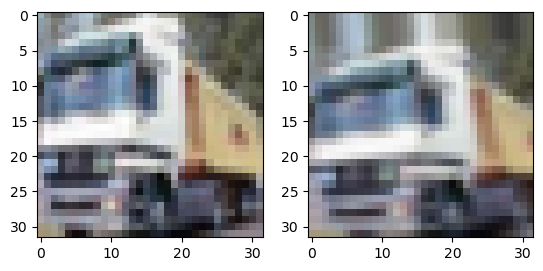

In [62]:
N = 1

for img, y in datagen.flow(X_train[N:N+1],
                           y_train[N:N+1],
                           batch_size=1):
    plt.subplot(1,2,1)
    plt.imshow(X_train[N])
    plt.subplot(1,2,2)
    plt.imshow(img[0])

    plt.show()
    break

(3, 32, 32, 3) (3, 10)


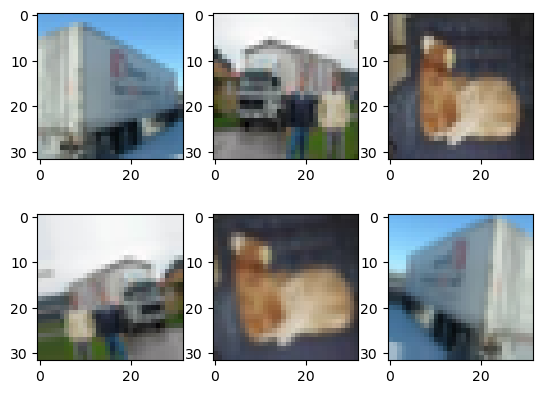

In [63]:
N = 15

for img, y in datagen.flow(X_train[N:N+3],
                           y_train[N:N+3],
                           batch_size=3):
    print(img.shape, y.shape)
    fig, ax = plt.subplots(2, 3)
    ax[0][0].imshow(X_train[N])
    ax[0][1].imshow(X_train[N+1])
    ax[0][2].imshow(X_train[N+2])
    
    ax[1][0].imshow(img[0])
    ax[1][1].imshow(img[1])
    ax[1][2].imshow(img[2])

    plt.show()
    break

1/1 [==============================] - 0s 417ms/step


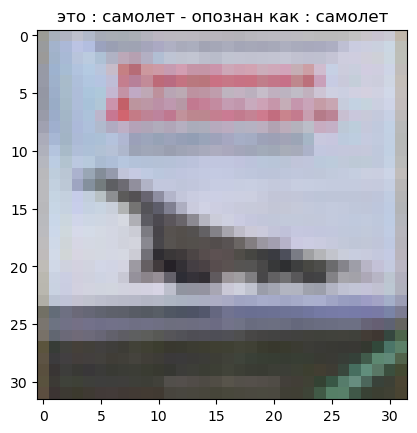

In [64]:
N = 3
y_p = model.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

https://www.kaggle.com/julichitai/gb-asl-classification

## Практическое задание

1. обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10
2. оценить рост точности при увеличении ширины сети (больше фильтров)
3. оценить рост точности при увеличении глубины сети (больше слоев)
4. *сравнить с точностью полносвязной сети для этой выборки


## Дополнительные материалы


1. https://keras.io/layers/convolutional/
2. https://keras.io/layers/pooling/
3. https://keras.io/preprocessing/image/
4. [Архитектуры нейросетей](https://habr.com/ru/company/nix/blog/430524/)
5. [LeNet](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)
6. [AlexNet](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)
7. [VGG](https://arxiv.org/abs/1409.1556)
8. [GoogLeNet](https://arxiv.org/abs/1409.4842)
9. [ResNet](https://arxiv.org/abs/1512.03385)
10. [Batch Normalization (батч-нормализация) что это такое?](https://proproprogs.ru/neural_network/batch-normalization-batch-normalizaciya-chto-eto-takoe)



## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://keras.io</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Николенко Сергей Игоревич, Кадурин А. А. - Глубокое обучение. Погружение в мир нейронных сетей  2018</li>
    <li>Francois Chollet - Deep Learning with Python 2018</li>
    <li>Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton - ImageNet Classification with Deep Convolutional Neural Networks</li>
    <li>Karen Simonyan, Andrew Zisserman - Very Deep Convolutional Networks for Large-Scale Image Recognition</li>
    <li>Википедия</li>    
</ol>

## Определения

**Глубокие нейронные сети** — это сети, с более чем одним внутренним слоем.

**Глубокое обучение** — это обучение глубоких нейронных сетей.

**Свёрточная нейронная сеть (convolutional neural network, CNN)** — специальная архитектура искусственных нейронных сетей, предложенная Яном Лекуном в 1988 году и нацеленная на эффективное распознавание образов.

**Слой пулинга** необходим для уменьшения размера свернутого элемента в пространстве. Это помогает уменьшить вычислительную мощность, необходимую для обработки данных, за счет уменьшения размерности. Кроме того, это важно и для извлечения доминирующих признаков.

**Dropout** — метод регуляризации искусственных нейронных сетей, предназначен для уменьшения переобучения сети за счет предотвращения сложных адаптаций отдельных нейронов на тренировочных данных во время обучения.

**Batch Normalization (Пакетная нормализация)** — метод, который позволяет повысить производительность и стабилизировать работу искусственных нейронных сетей. Суть данного метода заключается в том, что некоторым слоям нейронной сети на вход подаются данные, предварительно обработанные и имеющие нулевое мат. ожидание и единичную дисперсию.

---